# Logistic Regression
### Import Libraries

In [39]:
# Step 1 : import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



### Import dataset

In [40]:
df = pd.read_csv('../Datasets/candy-data.csv')

In [41]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


### Drop unwanted columns

In [42]:
df.drop(columns=['competitorname'], inplace=True)

### Train Test Split

In [43]:
trainingSet, testSet = train_test_split(df, test_size=0.2, random_state=7)

In [44]:
train_df = trainingSet
test_df = testSet

print(train_df, test_df)

    chocolate  fruity  caramel  peanutyalmondy  nougat  crispedricewafer  \
49          0       1        0               0       0                 0   
62          1       0        0               0       0                 0   
30          0       1        0               0       0                 0   
22          1       0        0               0       0                 0   
27          1       0        0               0       0                 0   
..        ...     ...      ...             ...     ...               ...   
23          1       0        0               0       0                 1   
67          0       1        0               0       0                 0   
25          1       0        0               0       0                 0   
68          0       1        0               0       0                 0   
47          1       0        0               1       0                 0   

    hard  bar  pluribus  sugarpercent  pricepercent  winpercent  
49     1    0        

In [45]:
df.columns.to_list()

['chocolate',
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer',
 'hard',
 'bar',
 'pluribus',
 'sugarpercent',
 'pricepercent',
 'winpercent']

### Splitting Input and Output features

In [46]:
x_train = train_df[[
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer',
 'hard',
 'bar',
 'pluribus',
 'sugarpercent',
 'pricepercent',
 'winpercent']]

y_train = train_df['chocolate']

x_test = test_df[[
 'fruity',
 'caramel',
 'peanutyalmondy',
 'nougat',
 'crispedricewafer',
 'hard',
 'bar',
 'pluribus',
 'sugarpercent',
 'pricepercent',
 'winpercent']]

y_test = test_df['chocolate']

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(68, 11) (17, 11) (68,) (17,)


In [47]:
y_train.value_counts()

chocolate
0    35
1    33
Name: count, dtype: int64

### Model Training

In [48]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(y_pred)

[0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0]


In [49]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0],
       [ 0,  4]])

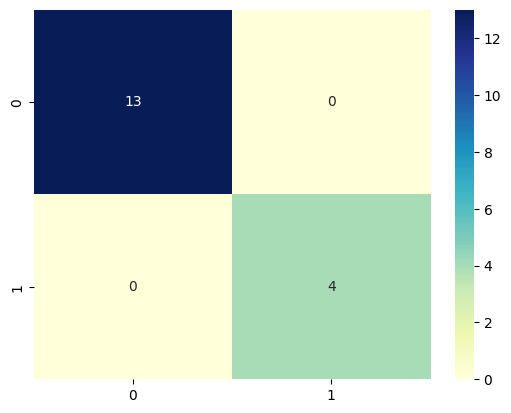

In [50]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu',fmt='g')
plt.show()

In [51]:
from sklearn import metrics

### Result

In [52]:
print('Accuracy:',metrics.accuracy_score(y_test, y_pred))
print('Precision:',metrics.precision_score(y_test, y_pred))
print('Recall:',metrics.recall_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
